In [1]:
# read data
import pandas as pd

df = pd.read_excel('4.3.xlsx')
df.head()

,Goal,Target,Indicator,SeriesCode,SeriesDescription,GeoAreaCode,GeoAreaName,TimePeriod,Value,Time_Detail,...,LowerBound,BasePeriod,Source,GeoInfoUrl,FootNote,Age,Nature,Reporting Type,Sex,Units
0,4,4.3,4.3.1,SE_ADT_EDUCTRN,Participation rate in formal and non-formal ed...,4,Afghanistan,2014,12.83215,2014,...,NaN,NaN,AFG - HIES - Households Living Conditions Surv...,NaN,NaN,15-64,E,G,BOTHSEX,PERCENT
1,4,4.3,4.3.1,SE_ADT_EDUCTRN,Participation rate in formal and non-formal ed...,4,Afghanistan,2014,17.48254,2014,...,NaN,NaN,AFG - HIES - Households Living Conditions Surv...,NaN,NaN,15-64,E,G,MALE,PERCENT
2,4,4.3,4.3.1,SE_ADT_EDUCTRN,Participation rate in formal and non-formal ed...,4,Afghanistan,2014,31.94815,2014,...,NaN,NaN,AFG - HIES - Households Living Conditions Surv...,NaN,NaN,15-24,E,G,BOTHSEX,PERCENT
3,4,4.3,4.3.1,SE_ADT_EDUCTRN,Participation rate in formal and non-formal ed...,4,Afghanistan,2014,20.67723,2014,...,NaN,NaN,AFG - HIES - Households Living Conditions Surv...,NaN,NaN,15-24,E,G,FEMALE,PERCENT
4,4,4.3,4.3.1,SE_ADT_EDUCTRN,Participation rate in formal and non-formal ed...,4,Afghanistan,2014,42.96634,2014,...,NaN,NaN,AFG - HIES - Households Living Conditions Surv...,NaN,NaN,15-24,E,G,MALE,PERCENT


In [2]:
# drop kolom kecuali GeoAreaCode, GeoAreaName, TimePeriod, Value, Age, Sex
df = df[['GeoAreaCode', 'GeoAreaName', 'TimePeriod', 'Value', 'Age', 'Sex']]
df.head(10)

,GeoAreaCode,GeoAreaName,TimePeriod,Value,Age,Sex
0,4,Afghanistan,2014,12.83215,15-64,BOTHSEX
1,4,Afghanistan,2014,17.48254,15-64,MALE
2,4,Afghanistan,2014,31.94815,15-24,BOTHSEX
3,4,Afghanistan,2014,20.67723,15-24,FEMALE
4,4,Afghanistan,2014,42.96634,15-24,MALE
5,4,Afghanistan,2014,8.19726,15-64,FEMALE
6,4,Afghanistan,2017,16.66899,15-64,MALE
7,4,Afghanistan,2017,30.02606,15-24,BOTHSEX
8,4,Afghanistan,2017,0.35826,25-54,MALE
9,4,Afghanistan,2017,0.26805,25-54,BOTHSEX


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12764 entries, 0 to 12763
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   GeoAreaCode  12764 non-null  int64  
 1   GeoAreaName  12764 non-null  object 
 2   TimePeriod   12764 non-null  int64  
 3   Value        12764 non-null  float64
 4   Age          12764 non-null  object 
 5   Sex          12764 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 598.4+ KB


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data hanya untuk GeoAreaName 'Indonesia'
df_indonesia = df[df['GeoAreaName'] == 'Indonesia']

# Cek data yang telah difilter
print(df_indonesia.head(20))

      GeoAreaCode GeoAreaName  TimePeriod     Value    Age      Sex
5382          360   Indonesia        2010   0.01943  55-64     MALE
5383          360   Indonesia        2010  10.68980  15-64  BOTHSEX
5384          360   Indonesia        2010  10.40173  15-64   FEMALE
5385          360   Indonesia        2010  38.67993  15-24     MALE
5386          360   Indonesia        2010   0.78416  25-54   FEMALE
5387          360   Indonesia        2010   0.01172  55-64  BOTHSEX
5388          360   Indonesia        2010  10.97635  15-64     MALE
5389          360   Indonesia        2010   0.95902  25-54     MALE
5390          360   Indonesia        2010  37.55594  15-24   FEMALE
5391          360   Indonesia        2010  38.12369  15-24  BOTHSEX
5392          360   Indonesia        2010   0.87141  25-54  BOTHSEX
5393          360   Indonesia        2011  11.25394  15-64  BOTHSEX
5394          360   Indonesia        2011  40.13913  15-24  BOTHSEX
5395          360   Indonesia        2011  39.73

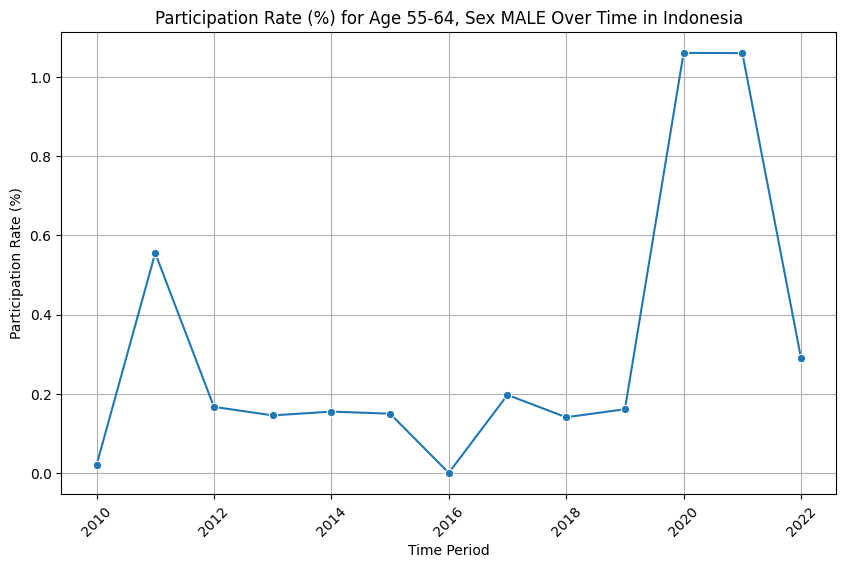

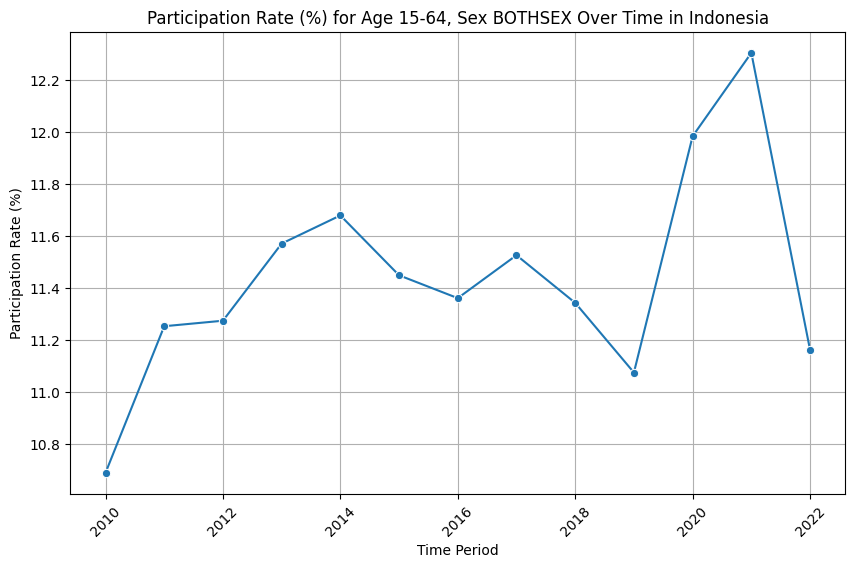

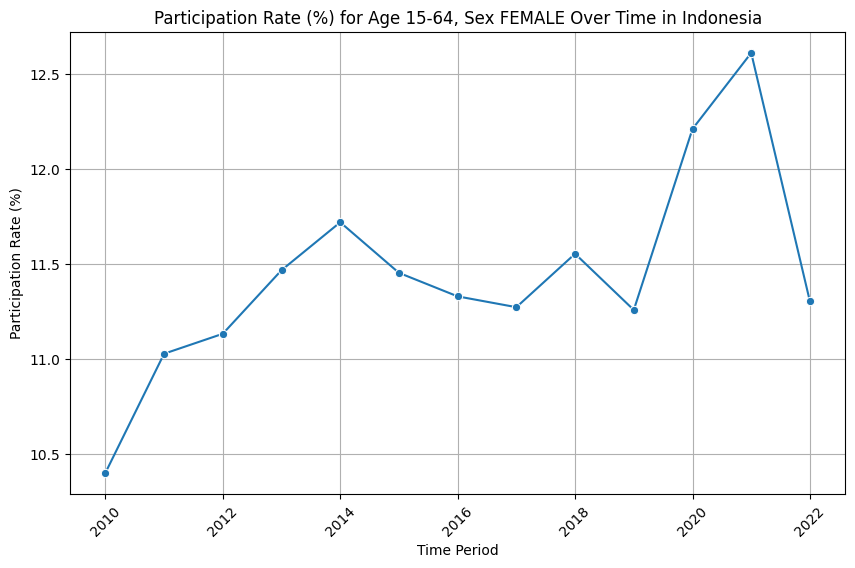

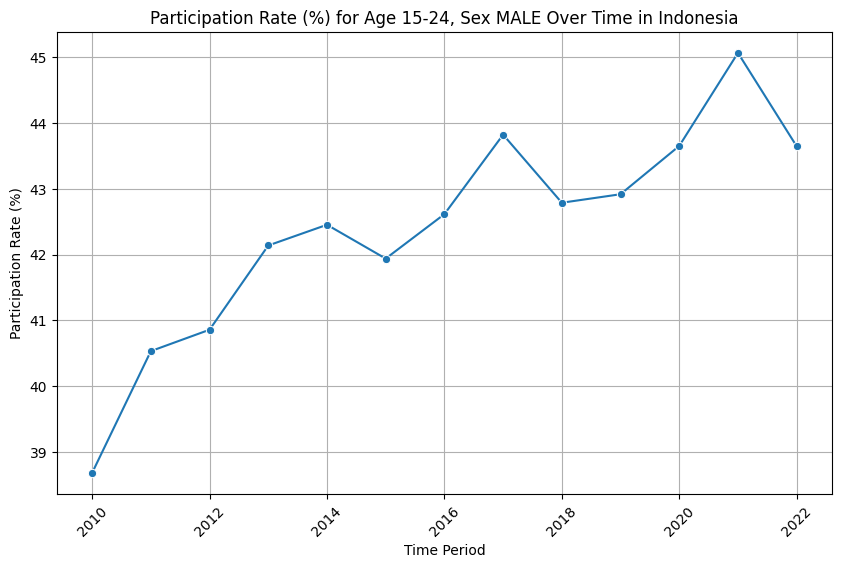

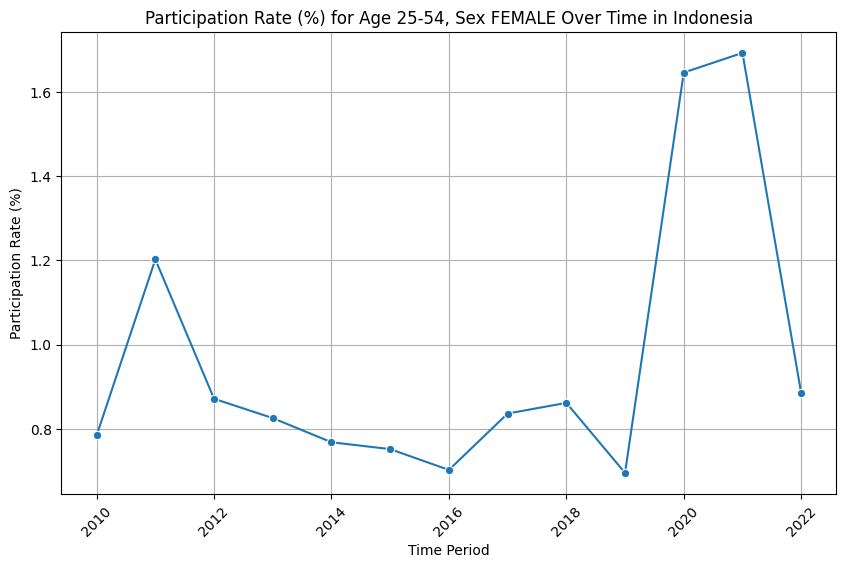

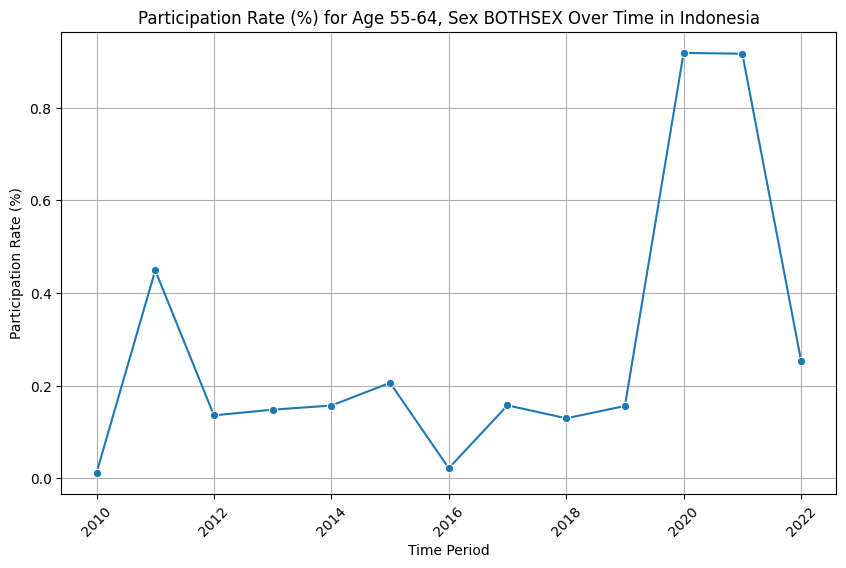

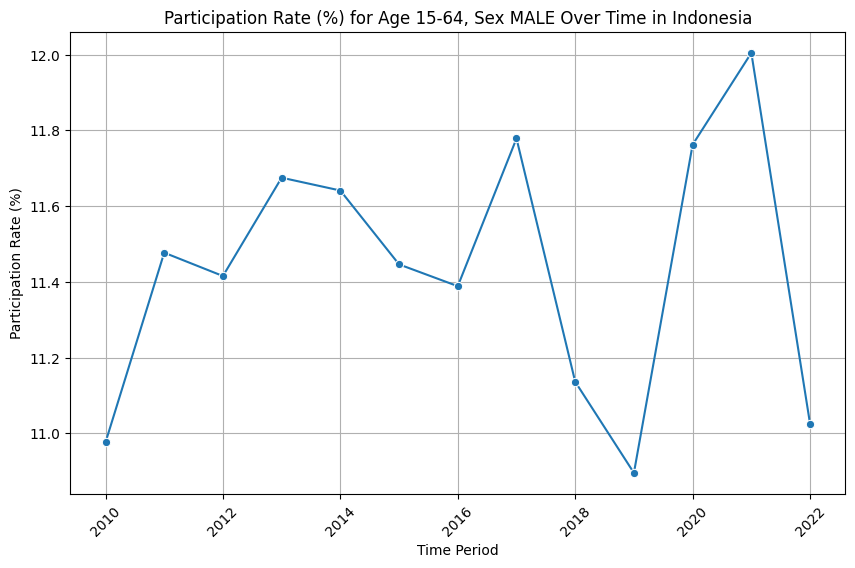

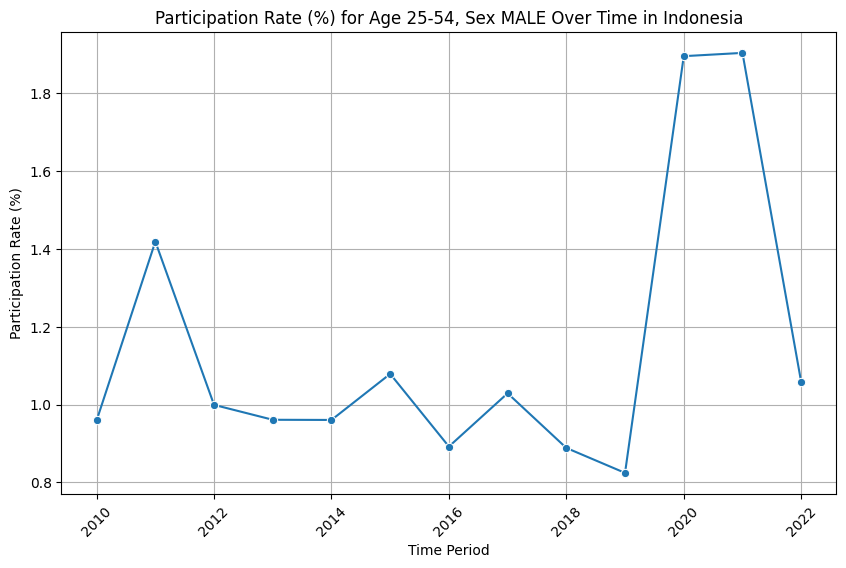

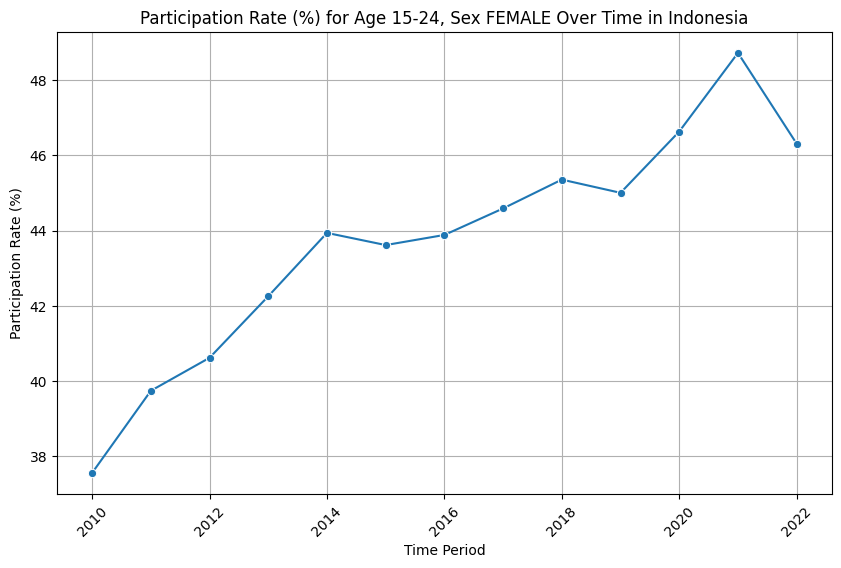

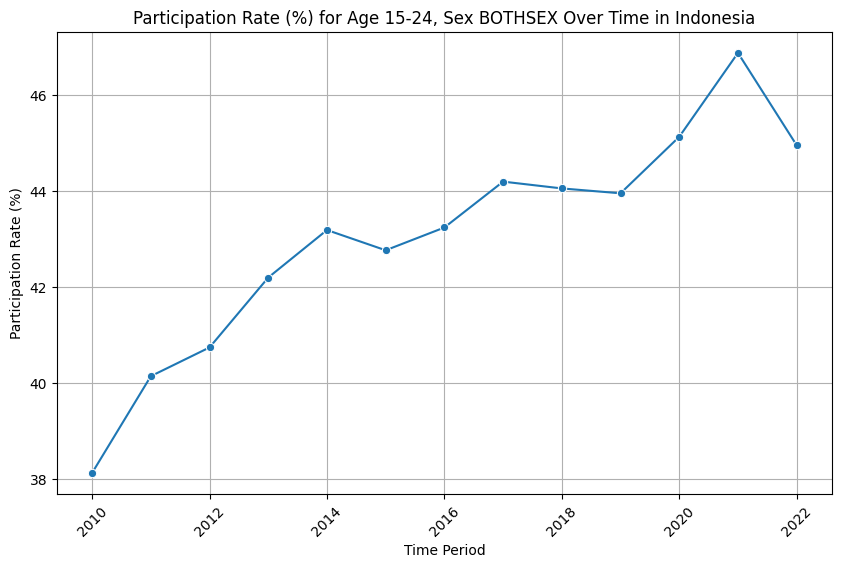

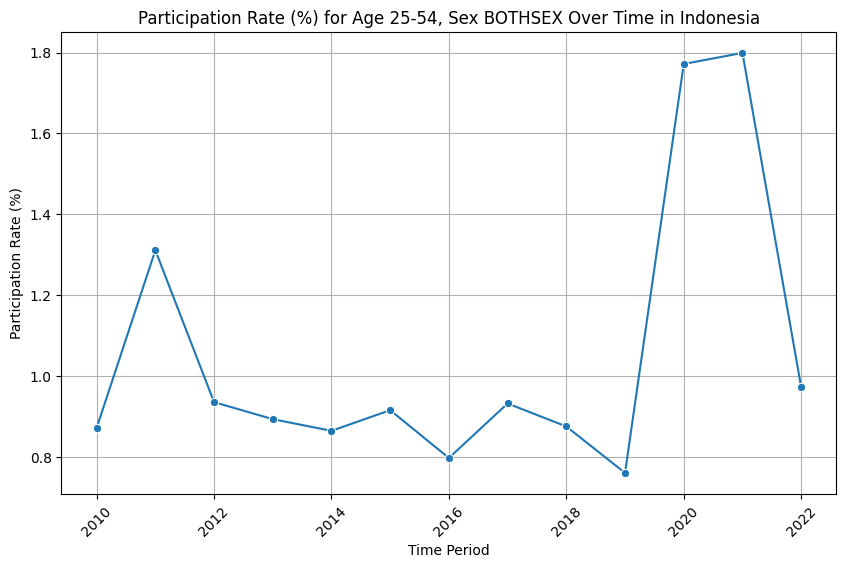

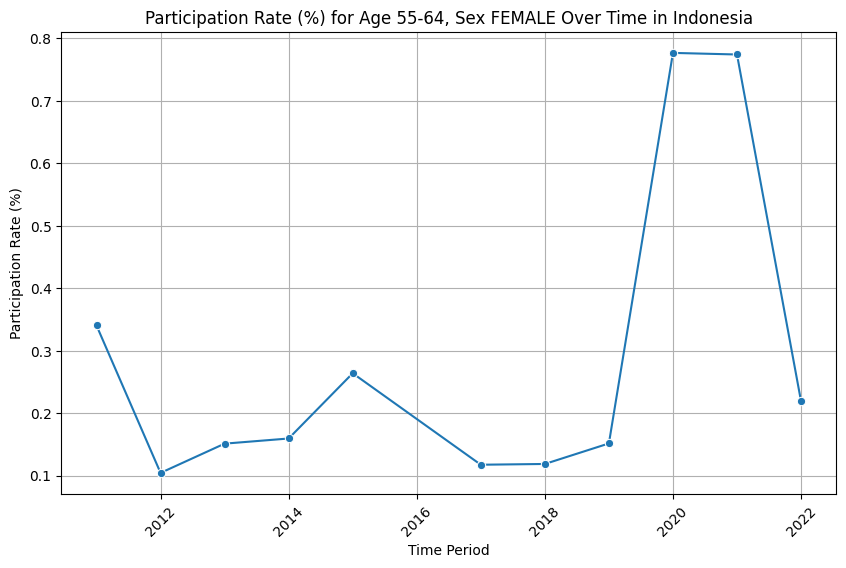

In [5]:
# Mengambil semua kombinasi unik dari 'Age' dan 'Sex'
combinations = df_indonesia[['Age', 'Sex']].drop_duplicates()

# Loop melalui setiap kombinasi Age dan Sex
for _, combo in combinations.iterrows():
    age_group = combo['Age']
    sex_group = combo['Sex']
    
    # Filter data berdasarkan kelompok usia dan jenis kelamin
    df_filtered = df_indonesia[(df_indonesia['Age'] == age_group) & (df_indonesia['Sex'] == sex_group)]
    
    # Plot data yang difilter
    plt.figure(figsize=(10,6))
    sns.lineplot(data=df_filtered, x='TimePeriod', y='Value', marker='o')
    plt.title(f'Participation Rate (%) for Age {age_group}, Sex {sex_group} Over Time in Indonesia')
    plt.xlabel('Time Period')
    plt.ylabel('Participation Rate (%)')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

## Penjelasan
Value dalam dataset tersebut (indikator 4.3.1) merepresentasikan tingkat partisipasi (participation rate) dari pemuda dan orang dewasa dalam pendidikan formal dan non-formal selama 12 bulan terakhir, yang diukur berdasarkan jenis kelamin.

Sebagai contoh:
- Jika Value adalah 0.5 untuk kategori "Age: 55-64, Sex: Male", ini berarti 0.5% dari laki-laki berusia 55-64 tahun di Indonesia berpartisipasi dalam pendidikan atau pelatihan selama periode waktu tersebut.
- Jika value pada dataset menunjukkan angka 38.6 untuk kategori "Age: 15-24, Sex: Male", ini berarti 38.6% dari laki-laki berusia 15-24 tahun di Indonesia berpartisipasi dalam pendidikan atau pelatihan selama periode waktu tersebut.